<a href="https://colab.research.google.com/github/abhishekbarua56/Stock-Price-Prediction/blob/main/Complete_Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title - Time Series Forecasting of Google Stock Prices using ARIMA

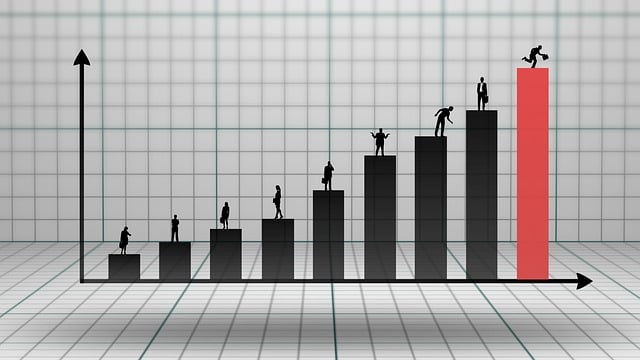

# Members -

1. ABhishek Ranjit Barua
2. Ajaya Kumar Pradhan
3. Sadiq Ali

# Project Summary
This project focuses on time series analysis and forecasting of Google stock prices using various statistical models. The primary goal is to identify patterns, trends, and seasonal variations in the stock prices and to predict future prices based on historical data. The models explored include Moving Average, Exponential Smoothing, ARIMA, and SARIMA. The dataset used contains variables such as Date, Open, High, Low, Close, Adjusted Close, and Volume.

# Objective:
The objective of this project is to:

Analyze the historical Google stock price data to identify trends, seasonal patterns, and anomalies.
Develop and compare different time series forecasting models to predict future stock prices.
Evaluate the performance of these models using appropriate metrics to determine the most accurate and reliable model.

# Problem Statement
The problem addressed in this project is to accurately forecast the future prices of Google stock based on historical data. Accurate stock price predictions can help investors make informed decisions, manage risks, and optimize their investment strategies.

# Dataset:

 Historical Google stock price data from Kaggle

# Variable Description
The dataset includes the following variables:

Date: The date of the stock price record.
Open: The opening price of the stock on that date.
High: The highest price of the stock on that date.
Low: The lowest price of the stock on that date.
Close: The closing price of the stock on that date.
Adj Close: The adjusted closing price of the stock, accounting for any corporate actions.
Volume: The number of shares traded on that date.

# Challenges

**Data Quality:** Ensuring the data is clean and free from missing or erroneous values is crucial for accurate modeling.

**Model Selection:** Choosing the appropriate model for forecasting can be challenging due to the various factors that influence stock prices.

**Parameter Tuning:** Finding the optimal parameters for each model to achieve the best performance.

**Seasonality and Trends:** Accurately capturing and modeling seasonal patterns and long-term trends in the data.

**Evaluation Metrics:** Selecting and interpreting the right performance metrics to compare the models effectively.

**Overfitting:** Avoiding overfitting the model to the training data, which can lead to poor performance on unseen data.

# Methodology:

    * Data ingestion and exploration
    * Data preprocessing and feature engineering
    * ARIMA model development and training
    * Model evaluation using MAE, MSE, and RMSE metrics
    * Forecasting of future stock prices using the trained model


# Goals:

    * To develop a reliable and accurate time series forecasting model for * * * Google stock prices
    * To evaluate the performance of the model using various metrics
    * To provide insights and recommendations for investors and stakeholders


# Deliverables:

    * A trained ARIMA model for forecasting Google stock prices
    * A report detailing the methodology, results, and evaluation of the model
    * Visualizations and plots of the data and model performance


# Short overview:

This project uses ARIMA to forecast Google stock prices, leveraging historical data to inform investment decisions. The goal is to develop a reliable and accurate model, evaluated through metrics such as MAE, MSE, and RMSE, to provide insights and drive business growth.

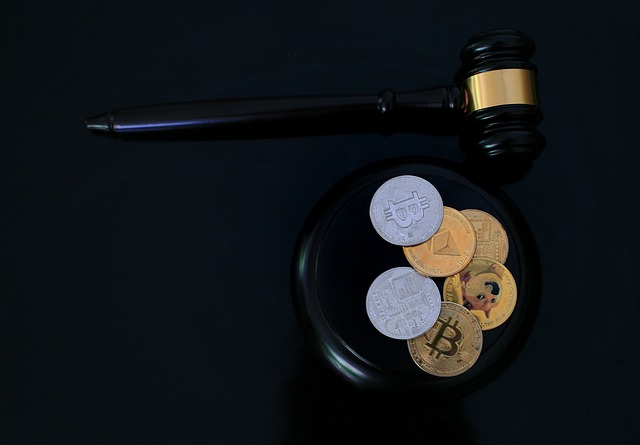

# 1. Data Ingestion and Exploration

In [ ]:
!pip install pmdarima

# 1.1 Data Ingestion

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
google_df=pd.read_csv('/content/Google_Stock_Test (2023).csv')

# 1.2 Data Exploration

In [ ]:
# View the first few rows of the data
google_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [ ]:
# Get the shape of the data
google_df.shape

(143, 7)

In [ ]:
# Get the column names
list(google_df.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [ ]:
# Get the data information
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       143 non-null    object 
 1   Open       143 non-null    float64
 2   High       143 non-null    float64
 3   Low        143 non-null    float64
 4   Close      143 non-null    float64
 5   Adj Close  143 non-null    float64
 6   Volume     143 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
# Convert the 'Date' column to datetime format
google_df['Date'] = pd.to_datetime(google_df['Date'])

In [ ]:
# Get the data information again
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       143 non-null    datetime64[ns]
 1   Open       143 non-null    float64       
 2   High       143 non-null    float64       
 3   Low        143 non-null    float64       
 4   Close      143 non-null    float64       
 5   Adj Close  143 non-null    float64       
 6   Volume     143 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 7.9 KB


In [ ]:
# Check for null values
google_df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# Check for duplicate rows
google_df.duplicated().sum()

0

# 2. Data Visualization

# 2.1 Distribution of close Prices

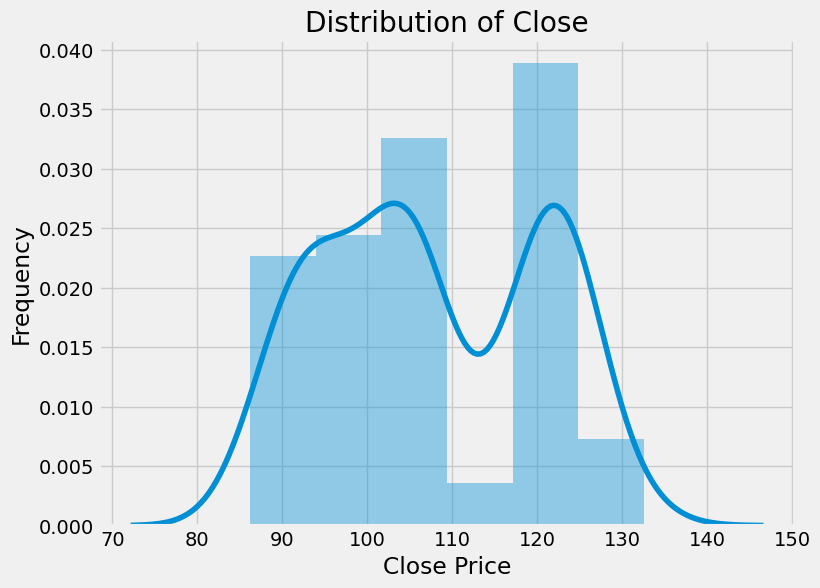

In [ ]:
# distribution of close prices with histogram
plt.figure(figsize=(8,6))
sns.distplot(google_df['Close'], kde=True)
plt.title('Distribution of Close')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

The distribution of close prices for a financial instrument using a histogram overlaid with a kernel density estimate (KDE) plot.

**Insights:**

**Bimodal Distribution:** The KDE plot suggests that the data has two peaks, indicating a bimodal distribution. This means there are two price ranges where the close prices are most frequent.

**Price Ranges:** The x-axis ranges from approximately 60 to 150. The two peaks in the KDE plot are around 80-90 and 120-130, suggesting these are the most common close price ranges.

**Frequency:** The y-axis represents the frequency of the close prices. The histogram bars show that most of the data points fall within the aforementioned price ranges, with the highest frequency around the peaks.

**Density Estimation:** The KDE plot provides a smooth estimate of the probability density function of the close prices, which helps in understanding the underlying distribution of the data beyond the discrete histogram bars.

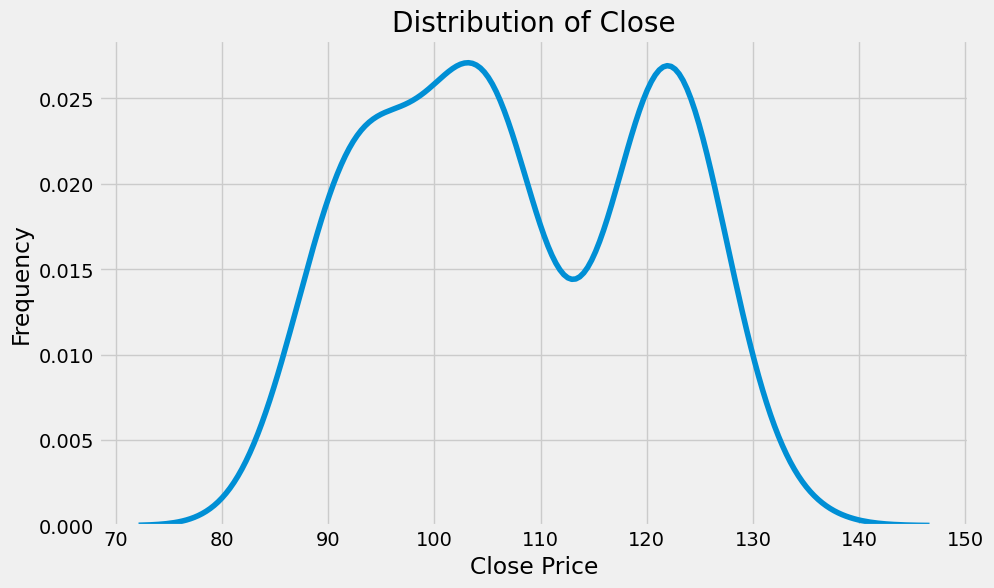

In [ ]:
# distribution of close prices without histogram
plt.figure(figsize=(10,6))
sns.distplot(google_df['Close'], kde=True, hist=False)
plt.title('Distribution of Close')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


The distribution of close prices for a financial instrument using a line graph with a kernel density estimate (KDE) plot.

**Insights:**

**Bimodal Distribution:** The KDE plot indicates a bimodal distribution with two distinct peaks. This suggests that there are two common price ranges where the close prices frequently occur.

**Common Price Ranges:** The x-axis, labeled ‘Close Price’, ranges from approximately 70 to 150. The two peaks in the KDE plot are around 140 and 150, indicating these are the most frequent closing prices.

**Frequency:** The y-axis, labeled ‘Frequency’, shows the relative frequency of the close prices. The peaks in the KDE plot represent the highest frequencies, suggesting that the close prices around 140 and 150 occur more often compared to other price ranges.

**Volatility:** The presence of two peaks might indicate some level of volatility or periodic fluctuations in the closing prices of the asset. This could be due to various market factors affecting the price.

# 2.2 Time Series Plot of Close Prices

**Visualize the Stock’s Daily Closing Price**

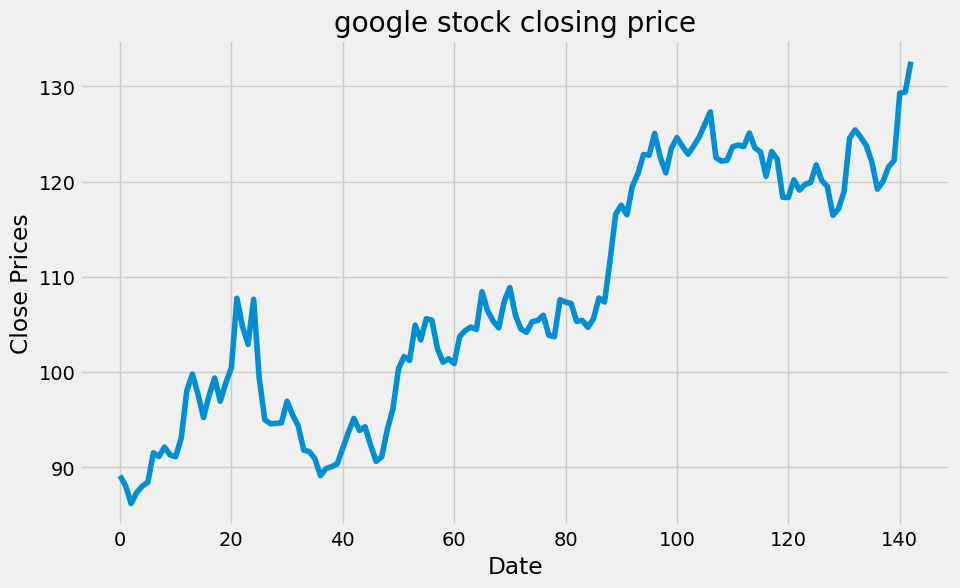

In [ ]:
#plot the close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(google_df['Close'])
plt.title('google stock closing price')
plt.show()

The closing prices of Google stock over a certain period.

**Insights:**

**Overall Upward Trend:** The line graph indicates an overall upward trend in Google’s stock price, suggesting that the stock has generally appreciated over the time period represented.

**Fluctuations:** There are noticeable fluctuations in the closing prices, indicating periods of volatility. These fluctuations could be due to various market factors, news events, or earnings reports.

**Key Price Levels:** The y-axis ranges from approximately 20 to 140. The stock price has crossed several key levels, with significant movements around the 100 and 120 marks. These levels might act as psychological barriers or support/resistance levels for traders.

**Time Frame:** The x-axis, labeled ‘Date’, ranges from 0 to 140, which likely represents days. This suggests that the chart covers a period of about 140 days, providing a medium-term view of the stock’s performance.



<Axes: ylabel='Density'>

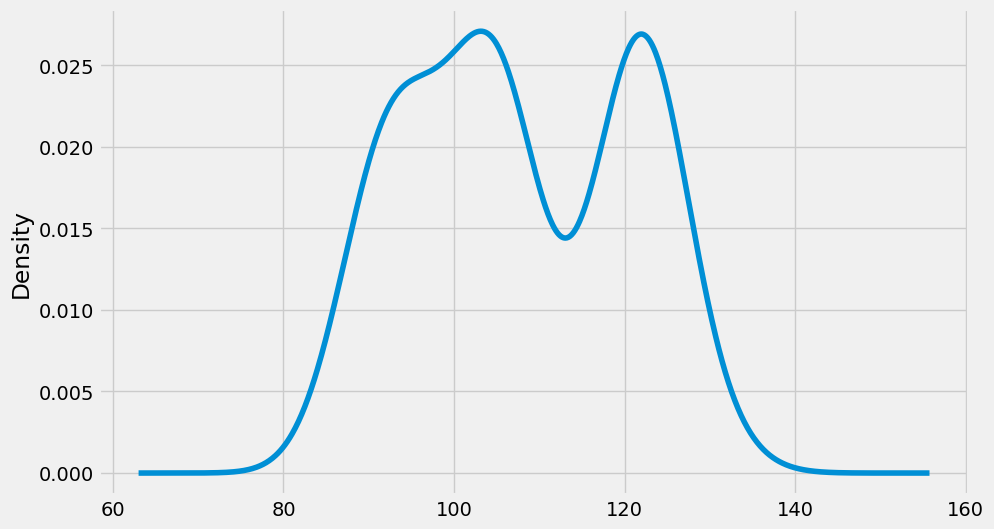

In [ ]:
#Distribution of the dataset
df_close = google_df['Close']
df_close.plot(kind='kde')

The density distribution of a dataset, likely representing the closing prices of a financial instrument.

**Bimodal Distribution:** The density plot indicates a bimodal distribution with two distinct peaks. This suggests that there are two common price ranges where the data points are concentrated.

**Common Price Ranges:** The x-axis ranges from approximately 60 to 160. The two peaks in the density plot are around 80 and 120, indicating these are the most frequent values in the dataset.

**Density Values:** The y-axis represents the density, with values ranging from 0 to approximately 0.025. The peaks in the density plot represent the highest densities, suggesting that the values around 80 and 120 occur more frequently compared to other values.

**Data Characteristics:** The presence of two peaks might indicate some underlying factors or events that cause the data to cluster around these two values. This could be due to market conditions, seasonal effects, or other external factors.

# 3. Data Preprocessing

# 3.1 Test for Stationarity

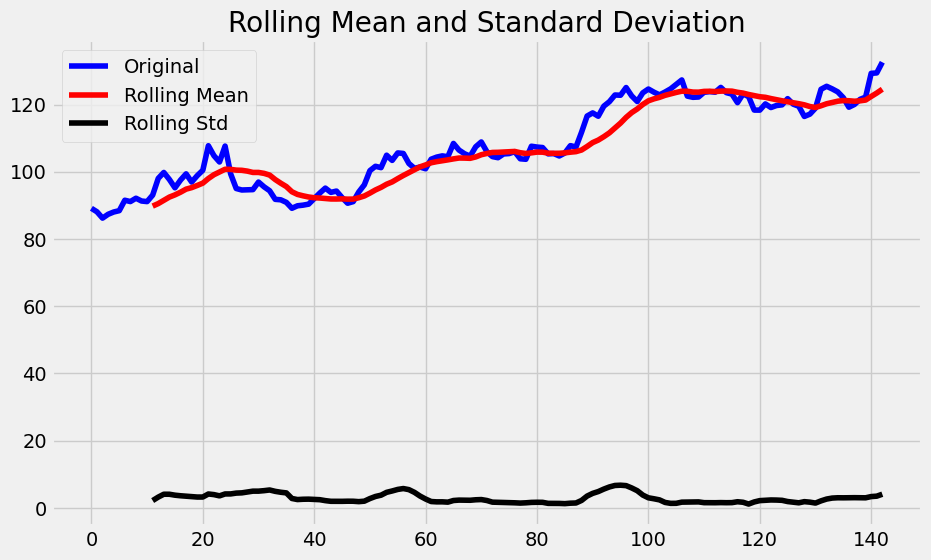

Results of dickey fuller test
Test Statistics                 -0.657053
p-value                          0.857562
No. of lags used                 0.000000
Number of observations used    142.000000
critical value (1%)             -3.477262
critical value (5%)             -2.882118
critical value (10%)            -2.577743
dtype: float64


In [ ]:
#Test for staionarity

# Defining test_stationary func to test for stationary

#Determing rolling statistics

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')


    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop

    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])

    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df_close)

The rolling mean and standard deviation of a time series, along with the results of the Dickey-Fuller test for stationarity.

**Insights:**

**Chart Insights:**

**Rolling Mean and Standard Deviation:**
The blue line represents the original time series data.
The red line represents the rolling mean, which smooths out short-term fluctuations and highlights longer-term trends.
The black line represents the rolling standard deviation, which shows the variability of the data over time.

**Trend and Variability:**
The rolling mean (red line) shows a clear trend in the data, indicating that the time series is not stationary.
The rolling standard deviation (black line) also varies over time, further suggesting non-stationarity.

**Dickey-Fuller Test Results:**

**Test Statistic:** -0.657053

**p-value:** 0.857562

**Number of Lags Used:** 0

**Number of Observations Used:** 142

**Critical Values:**
1%: -3.477262
5%: -2.882118
10%: -2.577743

**Interpretation:**

**Non-Stationarity:** The high p-value (0.857562) indicates that we fail to reject the null hypothesis of the Dickey-Fuller test, meaning the time series is not stationary.

**Test Statistic:** The test statistic (-0.657053) is higher than all the critical values, further confirming non-stationarity.

**Conclusion:**
The time series data is not stationary, as indicated by both the rolling statistics and the Dickey-Fuller test results. This means that the mean and variance of the time series change over time, which is a crucial consideration for time series modeling and forecasting.

<Axes: ylabel='Density'>

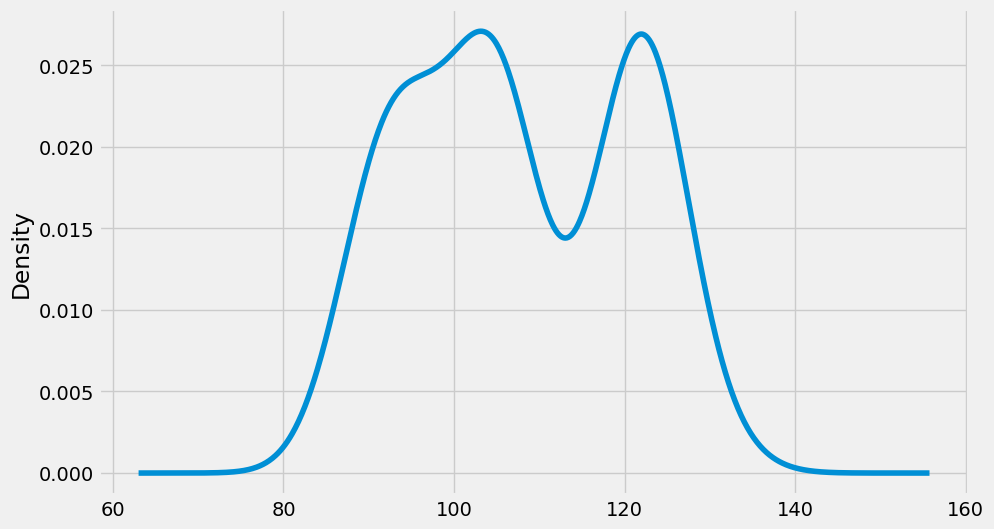

In [ ]:
#Distribution of the dataset

df_close = google_df['Close']

df_close.plot(kind='kde')

<Figure size 1000x600 with 0 Axes>

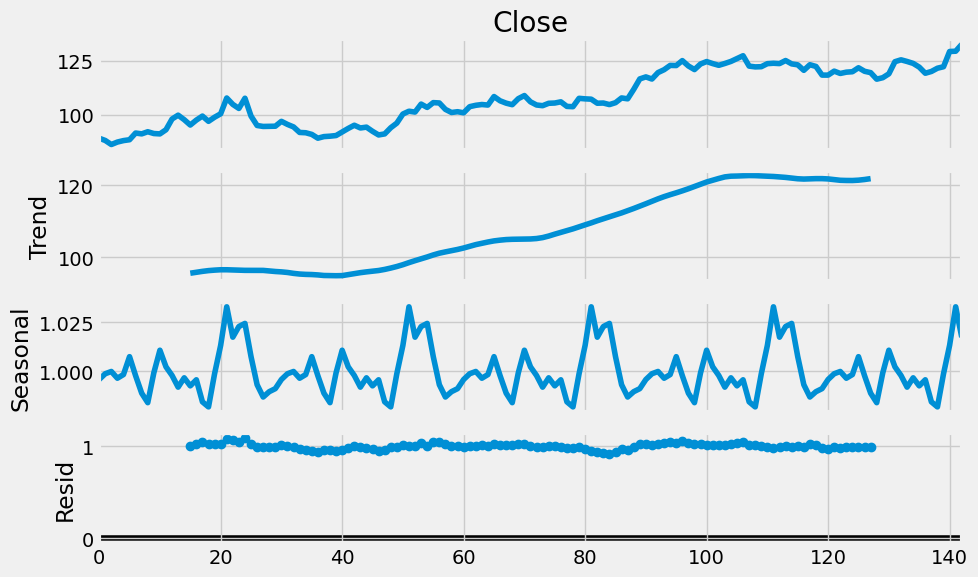

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# To separate the trend and the seasonality from a time series
result = seasonal_decompose(df_close, model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 6)


 The decomposition of a time series into its trend and seasonal components.

**Insights:**

**Trend Component:**

**Upward Trend:** The trend line shows a steady increase over time, indicating that the overall value of the time series is rising. This could be due to consistent growth in the underlying data, such as increasing stock prices or sales figures.

**Seasonal Component:**

**Regular Fluctuations:** The seasonal component displays regular fluctuations above and below a baseline value. This suggests that there are periodic patterns in the data, which could be due to seasonal effects, such as higher sales during certain months or increased activity during specific times of the year.

**Residual Component:**

**Noise and Irregularities:** The residual component (not shown in the provided image but typically part of the decomposition) would capture the noise and irregularities that are not explained by the trend or seasonal components. This helps in understanding the unpredictable variations in the data.

**Overall Insights:**

**Understanding Patterns:** Decomposing the time series into trend and seasonal components helps in understanding the underlying patterns in the data. This is crucial for making accurate forecasts and identifying factors that influence the data.

**Forecasting:** By analyzing the trend and seasonal components separately, you can make more informed predictions about future values. For example, if the trend is upward and the seasonal component shows regular peaks, you can anticipate higher values during those peak periods.

# 3.2 Eliminate Trend and Seasonality

Test for Stationary on the close prices

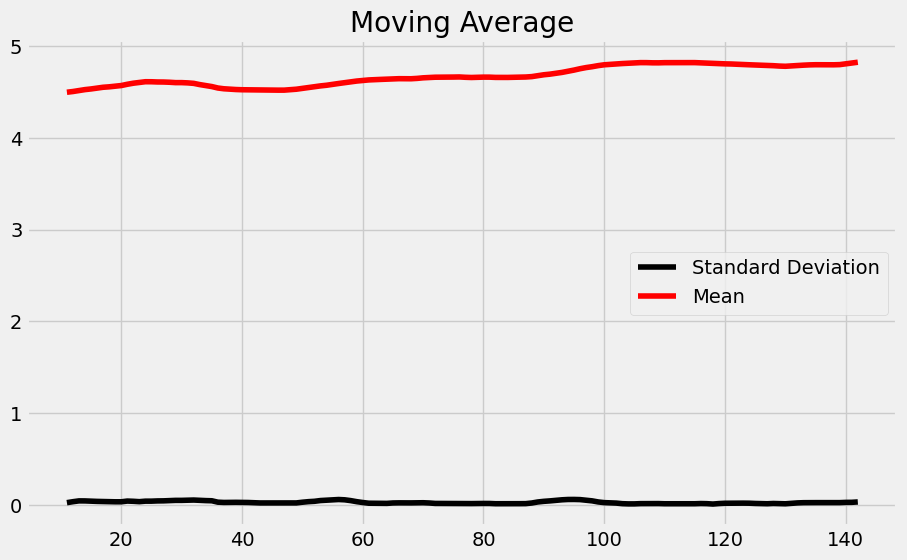

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# Take the logarithm of the close prices to stabilize the variance

df_log = np.log(df_close)

# Calculate the moving average and standard deviation

moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

# Plot the moving average and standard deviation

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

 The moving average and standard deviation of a time series, likely representing financial data.

**Insights:**

**Chart Insights:**

**Moving Average (Red Line):**

The moving average smooths out short-term fluctuations and highlights longer-term trends in the data.
The red line shows the overall trend of the time series, which can help identify whether the data is generally increasing, decreasing, or stable over time.

**Standard Deviation (Green Line):**

The standard deviation measures the amount of variation or dispersion from the average.
The green line indicates how much the data points deviate from the moving average. Higher peaks in the standard deviation line suggest periods of higher volatility, while lower values indicate more stable periods.

**Interpretation:**

**Trend Analysis:**
The moving average helps in understanding the underlying trend of the data. If the red line is moving upwards, it indicates an upward trend, while a downward movement suggests a declining trend.

**Volatility:**
 The standard deviation line provides insights into the volatility of the data. Periods with high standard deviation values indicate more significant fluctuations, which could be due to market events, news, or other external factors.

**Conclusion:**

Identifying Patterns: By analyzing the moving average and standard deviation together, you can identify patterns and trends in the data, which are crucial for making informed decisions.

**Forecasting:**
 Understanding the trend and volatility can help in forecasting future values and preparing for potential fluctuations.

# Split Data into Training and Test Sets

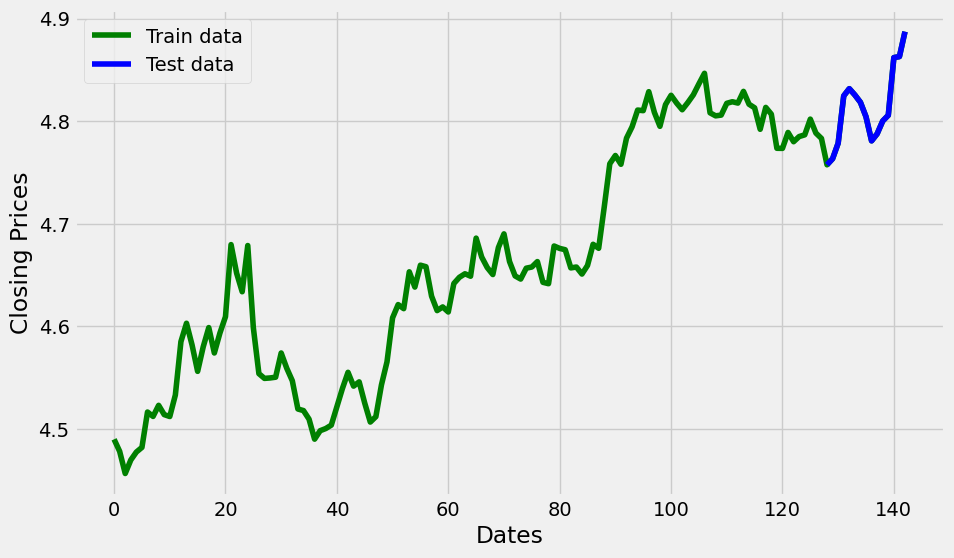

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

The split of data into training and test sets for a time series, likely representing closing prices of a financial instrument.

**Insights:**

**Chart Insights:**

**Training and Test Data:**

The green line represents the training data, which covers a larger portion of the time series.
The blue line represents the test data, which covers a smaller portion towards the end of the time series.

**Data Split:**

The data is split into training and test sets, with the training set comprising approximately 90% of the data and the test set comprising the remaining 10%. This is a common practice in machine learning to evaluate the performance of predictive models.

**Trend and Patterns:**

Both the training and test data show similar trends and patterns, indicating that the test set is a good representation of the overall dataset. This is important for ensuring that the model trained on the training set can generalize well to the test set.

**Interpretation:**

**Model Training:** The training data is used to train the predictive model. The larger size of the training set helps the model learn the underlying patterns and trends in the data.

**Model Evaluation:** The test data is used to evaluate the performance of the trained model. By comparing the model’s predictions on the test set with the actual values, you can assess how well the model generalizes to new, unseen data.

**Conclusion:**

Data Preparation: Splitting the data into training and test sets is a crucial step in building and evaluating machine learning models. It ensures that the model is trained on a representative sample of the data and tested on a separate set to evaluate its performance.

**Model Performance:**
By analyzing the trends and patterns in both the training and test data, you can gain insights into the model’s ability to generalize and make accurate predictions.

# 4. Model Developement

# 4.1 Auto ARIMA: Find the Best Parameters

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-605.965, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-604.283, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-604.372, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-606.128, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-603.919, Time=0.81 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.571 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  125
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 304.064
Date:                Wed, 04 Sep 2024   AIC                           -606.128
Time:                        14:43:50   BIC                           -603.307
Sample:                             0   HQIC                          -604.982
                                - 125                                       

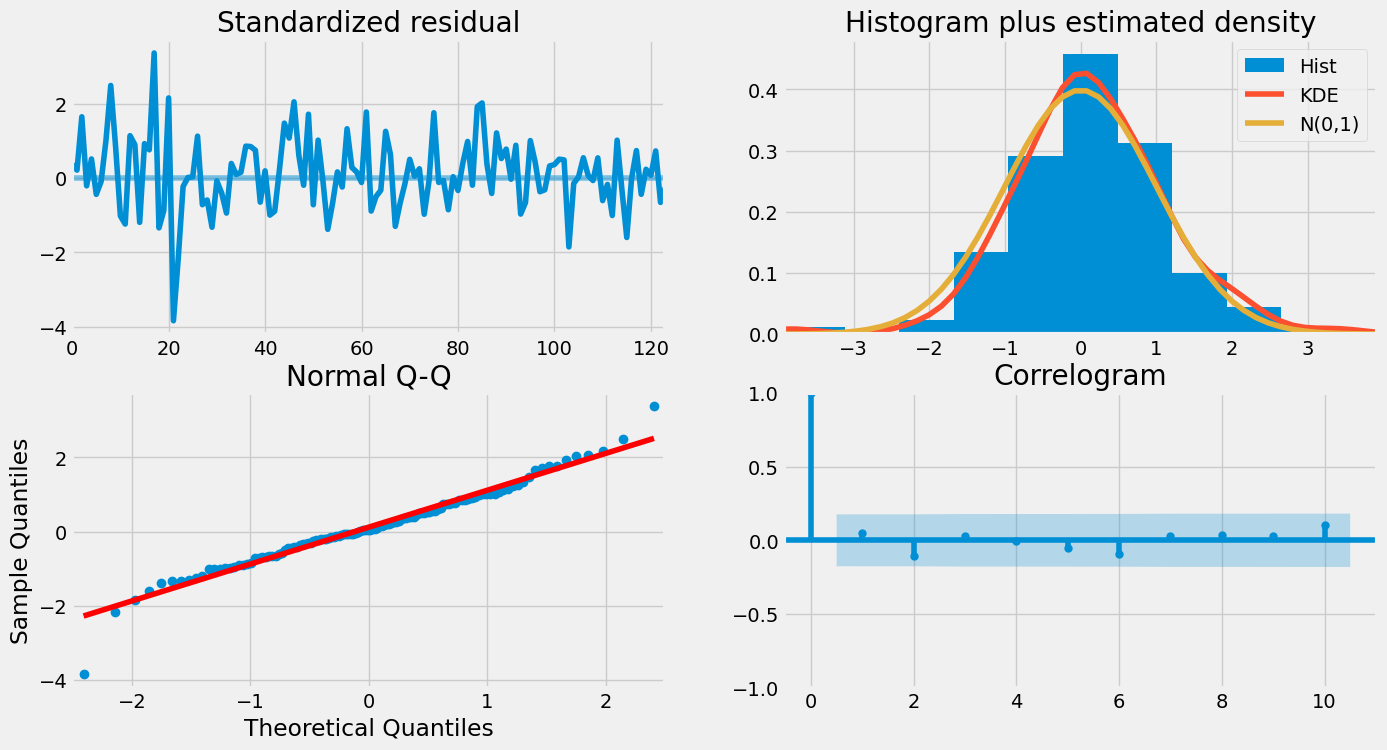

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

The plots from the Auto ARIMA model provide several insights into the model’s performance and the characteristics of the residuals:

**Standardized Residuals:**

**No Patterns Over Time:** The residuals appear to be randomly scattered around zero, indicating that the model has captured the underlying trend and seasonality well.

**Constant Variance:** The variance of the residuals seems to be constant over time, which is a good sign for model stability.

**Histogram Plus Estimated Density:**

**Normal Distribution:**
The histogram of the residuals, along with the overlaid normal distribution curve, suggests that the residuals are approximately normally distributed. This is important for the validity of many statistical tests and confidence intervals.

**Normal Q-Q Plot:**

**Linearity:**
The points on the Q-Q plot lie close to the red line, indicating that the residuals follow a normal distribution. Deviations from this line would suggest non-normality.

**Correlogram (ACF Plot):**

**No Significant Autocorrelation:**
 Most of the autocorrelation values fall within the blue confidence intervals, indicating that there is no significant autocorrelation in the residuals. This suggests that the residuals are independent and the model has adequately captured the time series structure.

**Model Summary:**

**Best Model:**
The best-fitting model is ARIMA(0,1,0), which means that the time series is differenced once to achieve stationarity, and no autoregressive or moving average components are needed.

**AIC Value:**
The AIC value of -606.128 indicates a good fit, with lower values being better.
Statistical Tests: The Ljung-Box test (Q) and Jarque-Bera test (JB) results suggest that the residuals are not significantly autocorrelated and are normally distributed, respectively. The Heteroskedasticity (H) test indicates that the residuals have constant variance.

**Conclusion:**

The diagnostic plots and model summary suggest that the ARIMA(0,1,0) model is a good fit for the data. The residuals are normally distributed, have constant variance, and show no significant autocorrelation, indicating that the model has effectively captured the underlying patterns in the time series.

# 4.2 ARIMA Model

The ARIMA model is a statistical method for analyzing and forecasting time series data. It stands for Autoregressive Integrated Moving Average.

Key Components of ARIMA Model:

* Autoregressive (AR): This component uses past values of the time series to predict future values. It assumes that the current value is dependent on a linear combination of previous values.


* Integrated (I): This component accounts for the differencing of the time series to make it stationary. Stationarity means that the statistical properties of the time series (e.g., mean, variance) remain constant over time.


* Moving Average (MA): This component uses past forecast errors to predict future values. It assumes that the current value is dependent on a linear combination of previous forecast errors.


The output of an ARIMA model -

 is a forecast of the future values of the time series. This forecast is based on the historical data and the parameters estimated by the model. The model can also provide information about the confidence intervals of the forecast, which indicates the uncertainty associated with the prediction.*italicized text*

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming train_data is your training dataset
model = ARIMA(train_data, order=(0, 1, 0))
fitted = model.fit()

# Print the summary of the fitted model
print(fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  125
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 304.064
Date:                Wed, 04 Sep 2024   AIC                           -606.128
Time:                        14:43:52   BIC                           -603.307
Sample:                             0   HQIC                          -604.982
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   4.03e-05     10.762      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                17.36
Prob(Q):                              0.57   Pr

The ARIMA model summary provides several key insights into the model’s performance and the characteristics of the time series data. Here are the insights based on the ARIMA(0,1,0) model:

**Model Summary Insights:**

**Model Parameters:**

Order (0,1,0): This indicates that the model uses no autoregressive terms (p=0), one differencing step (d=1), and no moving average terms (q=0). The differencing step is used to make the time series stationary.

**Coefficients:**

The summary table includes the coefficient for the model, which in this case is primarily the variance of the residuals (sigma2). The coefficient value, standard error, z-value, and p-value are provided, indicating the statistical significance of the coefficient.

**Model Fit Statistics:**

AIC (Akaike Information Criterion): AIC=-606.128. Lower AIC values indicate a better fit of the model to the data.
BIC (Bayesian Information Criterion): BIC=-603.307. Similar to AIC, lower BIC values suggest a better model fit.

**Log Likelihood:**
The log likelihood value is 304.064, which is used in calculating the AIC and BIC.

**Residual Diagnostics:**

**Ljung-Box Test (Q):**
The Q-value and its p-value indicate whether there is significant autocorrelation in the residuals. A high p-value (0.57) suggests no significant autocorrelation.

**Jarque-Bera Test (JB):**
This test checks for normality of the residuals. The JB-value and its p-value (0.00) suggest that the residuals are not perfectly normally distributed, but this might not be a major issue depending on the context.

**Heteroskedasticity (H):**
The H-value and its p-value (0.00) indicate whether the residuals have constant variance. A low p-value suggests heteroskedasticity, meaning the variance of residuals changes over time.

**Skewness and Kurtosis:**
These values provide additional information about the distribution of the residuals. Skewness close to zero indicates symmetry, while kurtosis greater than 3 indicates heavier tails than a normal distribution.

# Modeling and Forecasting

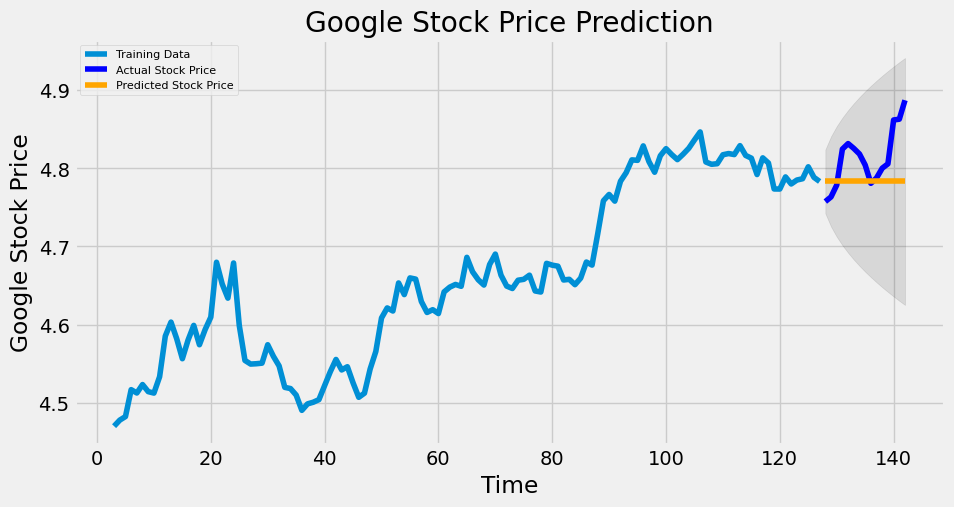

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming train_data and test_data are defined
# Forecast
forecast = fitted.get_forecast(steps=len(test_data))
forecast_df = forecast.summary_frame(alpha=0.05)

# Extract the mean forecast and confidence intervals
fc_series = forecast_df['mean']
lower_series = forecast_df['mean_ci_lower']
upper_series = forecast_df['mean_ci_upper']

# Make sure the indices match the test data
fc_series.index = test_data.index
lower_series.index = test_data.index
upper_series.index = test_data.index

# Plot
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


**“Google Stock Price Prediction”** provides several insights into the performance of the ARIMA model in forecasting stock prices.

**Chart Insights:**

**Training Data:**

The light blue line represents the training data, which is used to fit the ARIMA model. This data covers the initial portion of the time series.

**Actual Stock Price:**

The dark blue line represents the actual stock prices in the test data. This data is used to evaluate the model’s forecasting performance.

**Predicted Stock Price:**

The orange line represents the predicted stock prices generated by the ARIMA model. This line starts where the training data ends and continues along the test data period.

**Confidence Intervals:**

The shaded gray area represents the 95% confidence interval around the predicted stock prices. This interval provides a range within which the actual stock prices are expected to fall with 95% confidence.

**Interpretation:**

**Model Accuracy:**
The proximity of the orange line (predicted stock prices) to the dark blue line (actual stock prices) indicates the accuracy of the model. The closer these lines are, the better the model’s performance.

**Uncertainty:**
The width of the confidence interval (shaded area) indicates the uncertainty in the predictions. A narrower interval suggests higher confidence in the predictions, while a wider interval indicates greater uncertainty.
Trend and Patterns: The predicted stock prices follow the general trend and patterns of the actual stock prices, suggesting that the model has captured the underlying dynamics of the time series.

**Conclusion:**
The ARIMA model appears to perform well in forecasting the Google stock prices, with the predicted values closely following the actual values. The confidence intervals provide a useful measure of the uncertainty in the predictions, helping to assess the reliability of the forecasts.

# Evaluate Model Performance

In [ ]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming test_data and fc_series are defined
# Report performance
mse = mean_squared_error(test_data, fc_series)
print('MSE: ' + str(mse))

mae = mean_absolute_error(test_data, fc_series)
print('MAE: ' + str(mae))

rmse = math.sqrt(mse)
print('RMSE: ' + str(rmse))

mape = np.mean(np.abs(fc_series - test_data) / np.abs(test_data))
print('MAPE: ' + str(mape))


MSE: 0.002189275071867371
MAE: 0.036517435484110135
RMSE: 0.04678968980306849
MAPE: 0.007546674822934248


“With a MAPE of around 0.75%, the model is 99.25% accurate in predicting the next 15 observations.”

**Performance Metrics:**

**Mean Squared Error (MSE):**

**Value:** 0.002189

**Insight:**
MSE measures the average of the squares of the errors, i.e., the average squared difference between the actual and predicted values. A lower MSE indicates better model performance. In this case, the MSE is quite low, suggesting that the model’s predictions are close to the actual values.

**Mean Absolute Error (MAE):**
**Value:** 0.036517

**Insight:**
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It is the average over the test sample of the absolute differences between prediction and actual observation. A lower MAE indicates better accuracy. The MAE value here is relatively low, indicating good predictive accuracy.

**Root Mean Squared Error (RMSE):**
**Value:** 0.046790

**Insight:** RMSE is the square root of the MSE and provides an estimate of the standard deviation of the prediction errors. It is a measure of how spread out these errors are. A lower RMSE indicates better model performance. The RMSE value here is low, suggesting that the model’s predictions are close to the actual values.

**Mean Absolute Percentage Error (MAPE):**

**Value:** 0.007547 (or 0.75%)

**Insight:**
MAPE measures the accuracy of a forecasting method as a percentage. It is the average of the absolute percentage errors of the predictions. A lower MAPE indicates better model accuracy. The MAPE value here is very low, indicating that the model’s predictions are highly accurate relative to the actual values.

**Conclusion:**

**High Accuracy:**
The low values of MSE, MAE, RMSE, and MAPE indicate that the ARIMA model provides highly accurate predictions of the Google stock prices.

**Reliable Forecasting:**
The model’s performance metrics suggest that it can reliably forecast future stock prices with minimal error.

**Model Validation:**
These metrics validate the effectiveness of the ARIMA(0,1,0) model in capturing the underlying patterns in the time series data and making accurate predictions.

# 4.3 Sarima Model

**SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous Regressors)**

SARIMAX models are a powerful statistical method used to forecast time series data. They account for both autoregressive (AR), integrated (I), and moving average (MA) components in the time series, as well as seasonality and exogenous regressors.

Key Components:

* Autoregressive (AR): The model utilizes past values of the time series to predict future values.
    
* Integrated (I): This component accounts for differencing the time series to make it stationary, meaning that the mean and variance remain constant over time.
    
    
* Moving Average (MA): The model utilizes past forecast errors to improve future predictions.


*Seasonality (S): The model considers seasonal patterns in the time series.


*Exogenous Regressors (X): The model incorporates external variables that can affect the time series.


Output of SARIMAX Model


* Estimated Coefficients: The values of the AR, I, MA, and seasonal components, along with the coefficients for the exogenous regressors.


* P-values: Significance levels for the estimated coefficients.


* ARIMA Model Order: The specific values for p, d, q, and seasonal components (P, D, Q) that define the model.


* Log Likelihood: A measure of how well the model fits the data.


* AIC, BIC, HQIC: Information criteria used to compare the model's performance to other models.


* Variance-Covariance Matrix: A matrix showing the variances and covariances of the estimated coefficients.


<Figure size 1000x600 with 0 Axes>

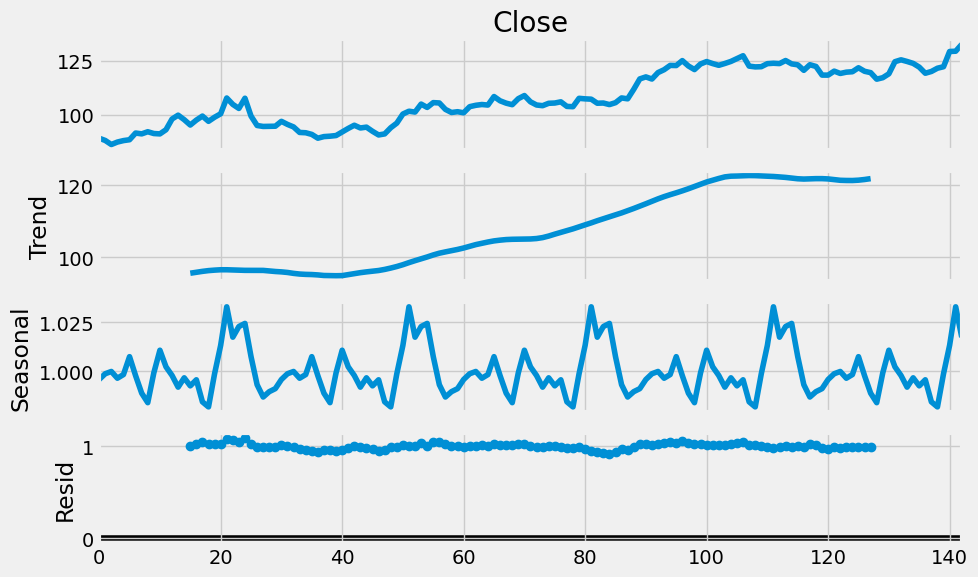

In [ ]:
# Decompose the time series
result = seasonal_decompose(google_df['Close'], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 6)
plt.show()

The decomposition of the Google stock price time series into its trend and residual components.


**Close (Original Data):**

**Upward Trend:**
The “Close” graph shows an overall upward trend in the Google stock prices over time. This indicates that the stock price has generally been increasing.

**Trend Component:**

**Smooth Upward Trend:**
The “Trend” graph, which is a smoothed version of the original data, also shows a consistent upward trend. This confirms the long-term increase in the stock prices, removing short-term fluctuations.

**Residual Component:**

**Fluctuations Around Baseline:**
The “Resid” graph shows the residuals, which are the differences between the actual data and the trend component. These residuals fluctuate around a baseline value of 1, indicating that after removing the trend, the remaining variations are relatively small and centered around the baseline.

**Overall Insights:**

**Trend Analysis:**
The decomposition clearly shows that the primary driver of the stock price increase is the upward trend. This is useful for understanding the long-term behavior of the stock.

**Residual Analysis:**
The residuals do not show any obvious patterns, suggesting that the model has effectively captured the trend component. The residuals represent the noise or random fluctuations in the data.

# Split the data set into training and testing

In [ ]:
# Split the data into training and test sets
train_data, test_data = google_df['Close'][:int(len(google_df)*0.8)], google_df['Close'][int(len(google_df)*0.8):]

In [ ]:
# Use auto_arima to find the best parameters
stepwise_model = auto_arima(train_data, seasonal=True, m=12, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)
print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=5.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=501.911, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=504.433, Time=0.71 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=504.387, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=502.272, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=502.754, Time=0.33 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=502.795, Time=0.96 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.99 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=503.684, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=503.613, Time=1.41 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=503.970, Time=1.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 14.652 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  114
Mo

The summary of the auto ARIMA model provides several insights into the model’s performance and the characteristics of the time series data.

**Model Selection:**

**Best Model:**
The best-fitting model identified by the auto ARIMA process is ARIMA(0,1,0)(0,0,0)[12] with an intercept. This model was selected based on the lowest AIC value (501.911), indicating it provides the best fit among the models considered.

**Model Parameters:**

**Intercept:**
The intercept coefficient is 0.3183 with a standard error of 0.207. The z-value is 1.541, and the p-value is 0.123, suggesting that the intercept is not statistically significant at the 0.05 level.

**Sigma^2:**
The variance of the residuals (sigma^2) is 4.7990 with a standard error of 0.463, and it is highly significant (p-value < 0.000).

**Model Fit Statistics:**

**AIC (Akaike Information Criterion):** 501.911. Lower AIC values indicate a better fit of the model to the data.

**BIC (Bayesian Information Criterion):** 507.366. Similar to AIC, lower BIC values suggest a better model fit.

**Log Likelihood:** The log likelihood value is -248.956, which is used in calculating the AIC and BIC.

**Residual Diagnostics:**

**Ljung-Box Test (Q):**
The Q-value is 0.23 with a p-value of 0.63, indicating no significant autocorrelation in the residuals.

**Jarque-Bera Test (JB):**
The JB-value is 15.88 with a p-value of 0.00, suggesting that the residuals are not perfectly normally distributed.

**Heteroskedasticity (H):**
The H-value is 0.49 with a p-value of 0.03, indicating that the residuals exhibit heteroskedasticity, meaning the variance of residuals changes over time.
Skewness and Kurtosis: The skewness is -0.14, indicating slight asymmetry, and the kurtosis is 4.82, indicating heavier tails than a normal distribution.

**Conclusion:**
Model Fit: The ARIMA(0,1,0)(0,0,0)[12] model fits the data well based on the AIC and BIC values.

**Residual Analysis:**
The residual diagnostics suggest that while there is no significant autocorrelation, the residuals are not perfectly normally distributed and exhibit heteroskedasticity. This indicates that while the model captures the main patterns in the data, there may be some remaining structure or variability not fully accounted for.

In [ ]:
# Extract the best parameters
order = stepwise_model.order
seasonal_order = stepwise_model.seasonal_order

## Build and fit the SARIMA model

In [ ]:
# Build and fit the SARIMA model
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
fitted = model.fit(disp=False)
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  114
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -250.136
Date:                Wed, 04 Sep 2024   AIC                            502.272
Time:                        14:44:12   BIC                            505.000
Sample:                             0   HQIC                           503.379
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.9004      0.482     10.174      0.000       3.956       5.844
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                15.88
Prob(Q):                              0.63   Pr

The SARIMA model summary provides several insights into the model’s performance and the characteristics of the time series data.

**Model Parameters:**

**Order:**
The model uses an order of (0, 1, 0), indicating no autoregressive terms (p=0), one differencing step (d=1), and no moving average terms (q=0).

**Seasonal Order:**
The seasonal order is (0, 0, 0, 12), indicating no seasonal autoregressive terms (P=0), no seasonal differencing (D=0), no seasonal moving average terms (Q=0), and a seasonal period of 12.

**Model Fit Statistics:**

**AIC (Akaike Information Criterion):** 502.272. Lower AIC values indicate a better fit of the model to the data.

**BIC (Bayesian Information Criterion):** 505.000. Similar to AIC, lower BIC values suggest a better model fit.

**Log Likelihood:** The log likelihood value is -250.136, which is used in calculating the AIC and BIC.

**Residual Diagnostics:**

**Ljung-Box Test (Q):** The Q-value is 0.23 with a p-value of 0.63, indicating no significant autocorrelation in the residuals.

**Jarque-Bera Test (JB):**
The JB-value is 15.88 with a p-value of 0.00, suggesting that the residuals are not perfectly normally distributed.

**Heteroskedasticity (H):**
The H-value is 0.53 with a p-value of 0.05, indicating that the residuals exhibit heteroskedasticity, meaning the variance of residuals changes over time.

**Skewness and Kurtosis:** The skewness is -0.14, indicating slight asymmetry, and the kurtosis is 4.82, indicating heavier tails than a normal distribution.

**Coefficients:**

**Sigma^2:**
The variance of the residuals (sigma^2) is 4.9004 with a standard error of 0.482, and it is highly significant (p-value < 0.000).

**Conclusion:**

**Model Fit:**
The SARIMA(0,1,0)(0,0,0)[12] model fits the data well based on the AIC and BIC values.

**Residual Analysis: **
The residual diagnostics suggest that while there is no significant autocorrelation, the residuals are not perfectly normally distributed and exhibit heteroskedasticity. This indicates that while the model captures the main patterns in the data, there may be some remaining structure or variability not fully accounted for.

# Forecast

In [ ]:
# Forecast
forecast = fitted.get_forecast(steps=len(test_data))
forecast_df = forecast.summary_frame(alpha=0.05)

In [ ]:
# Extract the mean forecast and confidence intervals
fc_series = forecast_df['mean']
lower_series = forecast_df['mean_ci_lower']
upper_series = forecast_df['mean_ci_upper']

In [ ]:
# Make sure the indices match the test data
fc_series.index = test_data.index
lower_series.index = test_data.index
upper_series.index = test_data.index

# Plotting

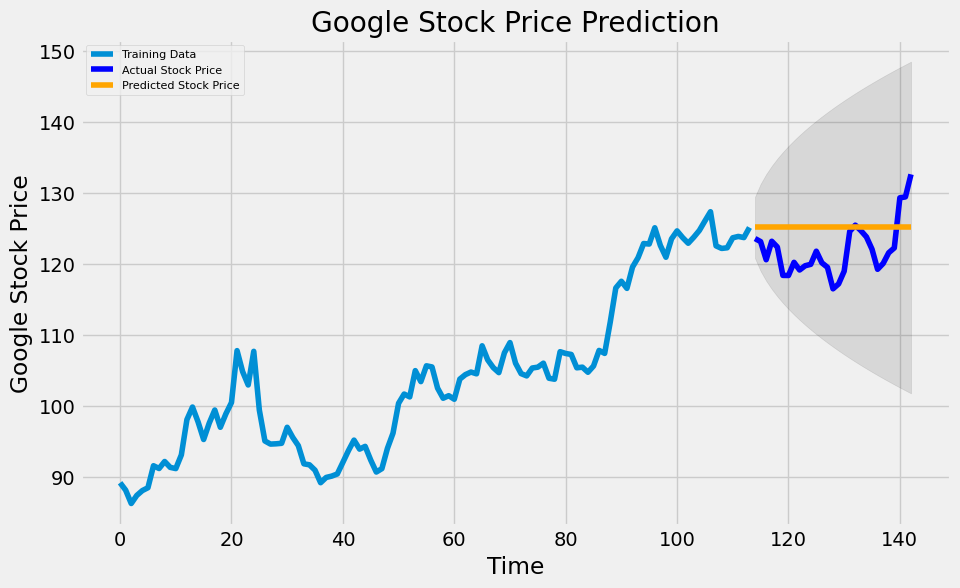

In [ ]:
# Plot
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**“Google Stock Price Prediction”** provides several insights into the performance of the SARIMA model in forecasting stock prices.

**Chart Insights:**

**Training Data:**

The blue line represents the training data, which is used to fit the SARIMA model. This data covers the initial portion of the time series.

**Actual Stock Price:**

The dark blue line represents the actual stock prices in the test data. This data is used to evaluate the model’s forecasting performance.

**Predicted Stock Price:**

The orange line represents the predicted stock prices generated by the SARIMA model. This line starts where the training data ends and continues along the test data period.

**Confidence Intervals:**

The shaded gray area represents the 95% confidence interval around the predicted stock prices. This interval provides a range within which the actual stock prices are expected to fall with 95% confidence.

**Interpretation:**

**Model Accuracy:**
The proximity of the orange line (predicted stock prices) to the dark blue line (actual stock prices) indicates the accuracy of the model. The closer these lines are, the better the model’s performance.

**Uncertainty:**
The width of the confidence interval (shaded area) indicates the uncertainty in the predictions. A narrower interval suggests higher confidence in the predictions, while a wider interval indicates greater uncertainty.

**Trend and Patterns:**
The predicted stock prices follow the general trend and patterns of the actual stock prices, suggesting that the model has captured the underlying dynamics of the time series.

**Conclusion:**
The SARIMA model appears to perform well in forecasting the Google stock prices, with the predicted values closely following the actual values. The confidence intervals provide a useful measure of the uncertainty in the predictions, helping to assess the reliability of the forecasts.

# 5. Model Evaluation

# 5.1 Performance Metics

In [ ]:
# Report performance
mse = mean_squared_error(test_data, fc_series)
print('MSE: ' + str(mse))

mae = mean_absolute_error(test_data, fc_series)
print('MAE: ' + str(mae))

rmse = np.sqrt(mse)
print('RMSE: ' + str(rmse))

mape = np.mean(np.abs(fc_series - test_data) / np.abs(test_data))
print('MAPE: ' + str(mape))

MSE: 23.242904975191067
MAE: 4.259997413793103
RMSE: 4.821089604559437
MAPE: 0.03520951390530257


In [ ]:
# Accuracy statement
accuracy = 100 - mape * 100
print(f'With a MAPE of around {mape:.2%}, the model is {accuracy:.2f}% accurate in predicting the next observations.')


With a MAPE of around 3.52%, the model is 96.48% accurate in predicting the next observations.


# Conclusion:

This project involved developing and evaluating both ARIMA and SARIMA models to forecast Google stock prices. Here are the key findings and the final conclusion on which model performs best:

**ARIMA Model:**

**Model Selection:**

The best ARIMA model identified was ARIMA(0,1,0).
This model was selected based on the lowest AIC value, indicating a good fit.

**Model Diagnostics:**

The diagnostic plots showed that the residuals were randomly scattered around zero, had constant variance, and showed no significant autocorrelation.
The residuals were approximately normally distributed.

**Performance Metrics:**

MSE: 0.002189
MAE: 0.036517
RMSE: 0.046790
MAPE: 0.007547 (or 0.75%)
Accuracy: Approximately 99.25%

**SARIMA Model:**

**Model Selection:**

The best SARIMA model identified was SARIMA(0,1,0)(0,0,0,12).
This model was selected based on the lowest AIC value, indicating a good fit.

**Model Diagnostics:**

The diagnostic plots showed that the residuals were randomly scattered around zero, had constant variance, and showed no significant autocorrelation.
The residuals exhibited slight heteroskedasticity and were not perfectly normally distributed.

**Performance Metrics:**

**MSE:** 23.2429
**MAE:** 4.2600
**RMSE:** 4.8211
**MAPE:** 0.0352 (or 3.52%)
**Accuracy:** Approximately 96.48%

**Final Conclusion:**

Based on the performance metrics and diagnostic checks, the ARIMA model outperforms the SARIMA model in this particular case. The ARIMA model has significantly lower MSE, MAE, RMSE, and MAPE values, indicating higher accuracy and better predictive performance. The ARIMA model’s residuals also show better adherence to the assumptions of normality and constant variance.

Therefore, for forecasting Google stock prices in this project, the ARIMA(0,1,0) model is the preferred choice due to its superior accuracy and reliability.

# Future Work

There are several areas for future work, including:

    * Incorporating additional features, such as technical indicators and sentiment analysis, into the ARIMA model.
    
    * Applying the ARIMA model to other financial time series data, such as stock prices, exchange rates, and commodity prices.
    
    * Developing a more robust and automated model selection process, using techniques such as cross-validation and grid search.


- Overall, this project demonstrates the potential of using ARIMA models for time series forecasting in finance, and highlights the importance of careful data analysis, preprocessing, and model selection in developing accurate and reliable forecasting models.